In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [2]:
#Расчет Варианта
I = 7
N = 15 + I
print(f"Мой вариант = {N}")

Мой вариант = 22


##### Задача 6.1. 
Вычислить  интеграл $$\int_{0}^{3} (cosx)^2sinx \,dx $$  с точностью    по формуле левых прямо-угольников  и по формуле правило 3/8.

In [3]:
#1. Вычислить интеграл  аналитически.
I = -((np.cos(3))**3)/3 +((np.cos(0))**3)/3
print(f"I = {I}")

I = 0.6567589793071678


In [4]:
#процедуру-функцию, вычисляющую интеграл по составной квадратурной формуле левых прямоугольников с заданным шагом h.
def f(x):
    return (np.cos(x))**2*np.sin(x)

def left_rect(a,b,h,n):
    n = int((b-a)//h)+1
    x = np.linspace(a,b, n)
    S = np.sum(f(x[0:n]))
    return h*S

def tri_vosm(a, b,h, n):
    integration = f(a) + f(b)
    
    for i in range(1,n):
        k = a + i*h
        if i%3 == 0:
            integration = integration + 2 * f(k)
        else:
            integration = integration + 3 * f(k)
    
    # Finding final integration value
    integration = integration * 3 * h / 8    
    return integration


In [5]:
def Abs_R(I_h, I):
    return np.abs(I_h - I)

def I_h(a,b,h,met,n):
    return met(a,b,h,n)

In [6]:
def Runge_corr(I1, I2, p):
    return (I1) + (I1-I2)/(2**p-1)


In [7]:
def Runge(I1,I2,p):
    return (I1-I2)/(2**p-1)

def find_h_Runge(a,b,eps,met,p,I):
    n=1
    h= (b-a)/n
    I1 = I_h(a,b,h/2,met,n)
    I2 = I_h(a,b,h,met,n)
    while np.abs(Runge(I1, I2,p))>=eps:
        n *=2
        h=(b-a)/n
        I1 = I2
        I2 = I_h(a,b,h,met,n)
    return h, n, I1,I2

In [8]:
a = 0
b = 3
eps1 = 10**(-7)

h1,n1, I1_left,I2_left = find_h_Runge(a,b,eps1,left_rect,1,I)
n2 = int((b -a)/h1)
print(n2)
I1_u = Runge_corr(I1_left,I2_left,1)
print(f"Для левых прямоугольников:")
print(f"n = {n1}; h = {h1};")
print(f"Значения интеграла I_h = {I2_left}; I_h/2 = {I1_left};")
print(f"Значения абсолютных погрешностей R_h ={Abs_R(I2_left,I)}; R_h/2 = {Abs_R(I1_left,I)};")
print(f"Bеличины для уточненного значения интеграла I_u = {I1_u}; R_u= {Abs_R(I1_u, I)};")
print()

eps = 10**(-12)
h2,n2, I1_tri,I2_tri = find_h_Runge(a,b,eps,tri_vosm,4,I)
n3 = int((b -a)/h2)
print(n3)
I2_u = Runge_corr(I1_tri,I2_tri,4)
print(f"Для 3/8:")
print(f"n = {n2}; h = {h2};")
print(f"Значения интеграла I_h = {I2_tri}; I_h/2 = {I1_tri};")
print(f"Значения абсолютных погрешностей R_h = {Abs_R(I2_tri,I)}; R_h/2 = {Abs_R(I1_tri,I)};")
print(f"Bеличины для уточненного значения интеграла I_u = {I2_u}; R_u= {Abs_R(I2_u, I)};")


2097152
Для левых прямоугольников:
n = 2097152; h = 1.430511474609375e-06;
Значения интеграла I_h = 0.6567590782335906; I_h/2 = 0.656759177159354;
Значения абсолютных погрешностей R_h =9.892642283126918e-08; R_h/2 = 1.9785218619006173e-07;
Bеличины для уточненного значения интеграла I_u = 0.6567592760851173; R_u= 2.967779495488543e-07;

1048576
Для 3/8:
n = 1048576; h = 2.86102294921875e-06;
Значения интеграла I_h = 0.6567588803794744; I_h/2 = 0.6567588803766042;
Значения абсолютных погрешностей R_h = 9.892769337049856e-08; R_h/2 = 9.893056351906182e-08;
Bеличины для уточненного значения интеграла I_u = 0.656758880376413; R_u= 9.893075481048896e-08;


Задача 6.2. Вычислить интеграл от многочлена  $$I =\int_{0}^{3} 1.4x^{10} +1.6x^{9}+2.1x^{8}+0.3x^{7}+2.1x^{6}+5.4x^{5}+5.3x^{4}+2.4x^{3}-3.3x^{2}+15x+4.4 \,dx $$ по формуле Гаусса при числе узлов  N=2, 3, 4,5.  Вычислить аналитически тот же интеграл. Найти абсолютные  погрешности  каждого результата. Объяснить полученные результаты. Отрезок интегрирования [0,3]

In [9]:
import sympy as sy

#Вычисление а
def P(x):
    return 1.4*x**10 +1.6*x**9+2.1*x**8+0.3*x**7+2.1*x**6+5.4*x**5+5.3*x**4+2.4*x**3-3.3*x**2+15*x+4.4

def f(t,a,b):
    return P((a+b)/2+(b-a)/2 * t)

def Gauss(a,b,A,t):
    S = 0
    for i in range(len(A)):
        S += A[i]*f(t[i],a,b)
    return (b-a)/2*S

In [10]:
#Вычислим интеграл аналитически
x = sy.Symbol("x")
I = sy.integrate(P(x), (x, 0, 3))
print(f"Интеграл вычесленный аналитически I = {I}")

A2 = np.array([1,1])
A3 = np.array([8/9,5/9,5/9])
A4 = np.array([(18+30**(1/2))/2, (18+30**(1/2))/2,(18-30**(1/2))/2,(18-30**(1/2))/2])
A5 = np.array([128/225, (322+13*(70)**(1/2))/900,(322+13*(70)**(1/2))/900,(322-13*(70)**(1/2))/900,(322-13*(70)**(1/2))/900])


t2 =np.array([1/(3)**(1/2),-1/(3)**(1/2)])
t3 =np.array([0,(3/5)**(1/2),-(3/5)**(1/2)])
t4 = np.array([0, (3/7 - 2/7*(6/5)**(1/2))**(1/2), -(3/7 - 2/7*(6/5)**(1/2))**(1/2), (3/7 + 2/7*(6/5)**(1/2))**(1/2),-(3/7 +2/7*(6/5)**(1/2))**(1/2)])

t5 = np.array([0,1/3*(5-2*(10/7)**(1/2))**(1/2), -1/3*(5-2*(10/7)**(1/2))**(1/2),1/3*(5+2*(10/7)**(1/2))**(1/2),-1/3*(5+2*(10/7)**(1/2))**(1/2)])

I_g2 = Gauss(a,b,A2,t2)
R2 = Abs_R(I_g2,I)
print(f"При N = 2 значение I = {I_g2}, абсолютная погрешность R = {R2}")

I_g3 = Gauss(a,b,A3,t3)
R3 = Abs_R(I_g3,I)
print(f"При N = 3 значение I = {I_g3}, абсолютная погрешность R = {R3}")

I_g4 = Gauss(a,b,A4,t4)
R4 = Abs_R(I_g4,I)
print(f"При N = 4 значение I = {I_g4}, абсолютная погрешность R = {R4}")

I_g5 = Gauss(a,b,A5,t5)
R5 = Abs_R(I_g5,I)
print(f"При N = 5 значение I = {I_g5}, абсолютная погрешность R = {R5}")


Интеграл вычесленный аналитически I = 38501.9393181818
При N = 2 значение I = 21907.162500000017, абсолютная погрешность R = 16594.7768181818
При N = 3 значение I = 36368.59810875001, абсолютная погрешность R = 2133.34120943180
При N = 4 значение I = 696931.9096465623, абсолютная погрешность R = 658429.970328380
При N = 5 значение I = 38501.58428571431, абсолютная погрешность R = 0.355032467508863


## Задание 6.3

#### 1.Определить коэффициенты a, b, c, d так, чтобы формула имела максимальный порядок точности.
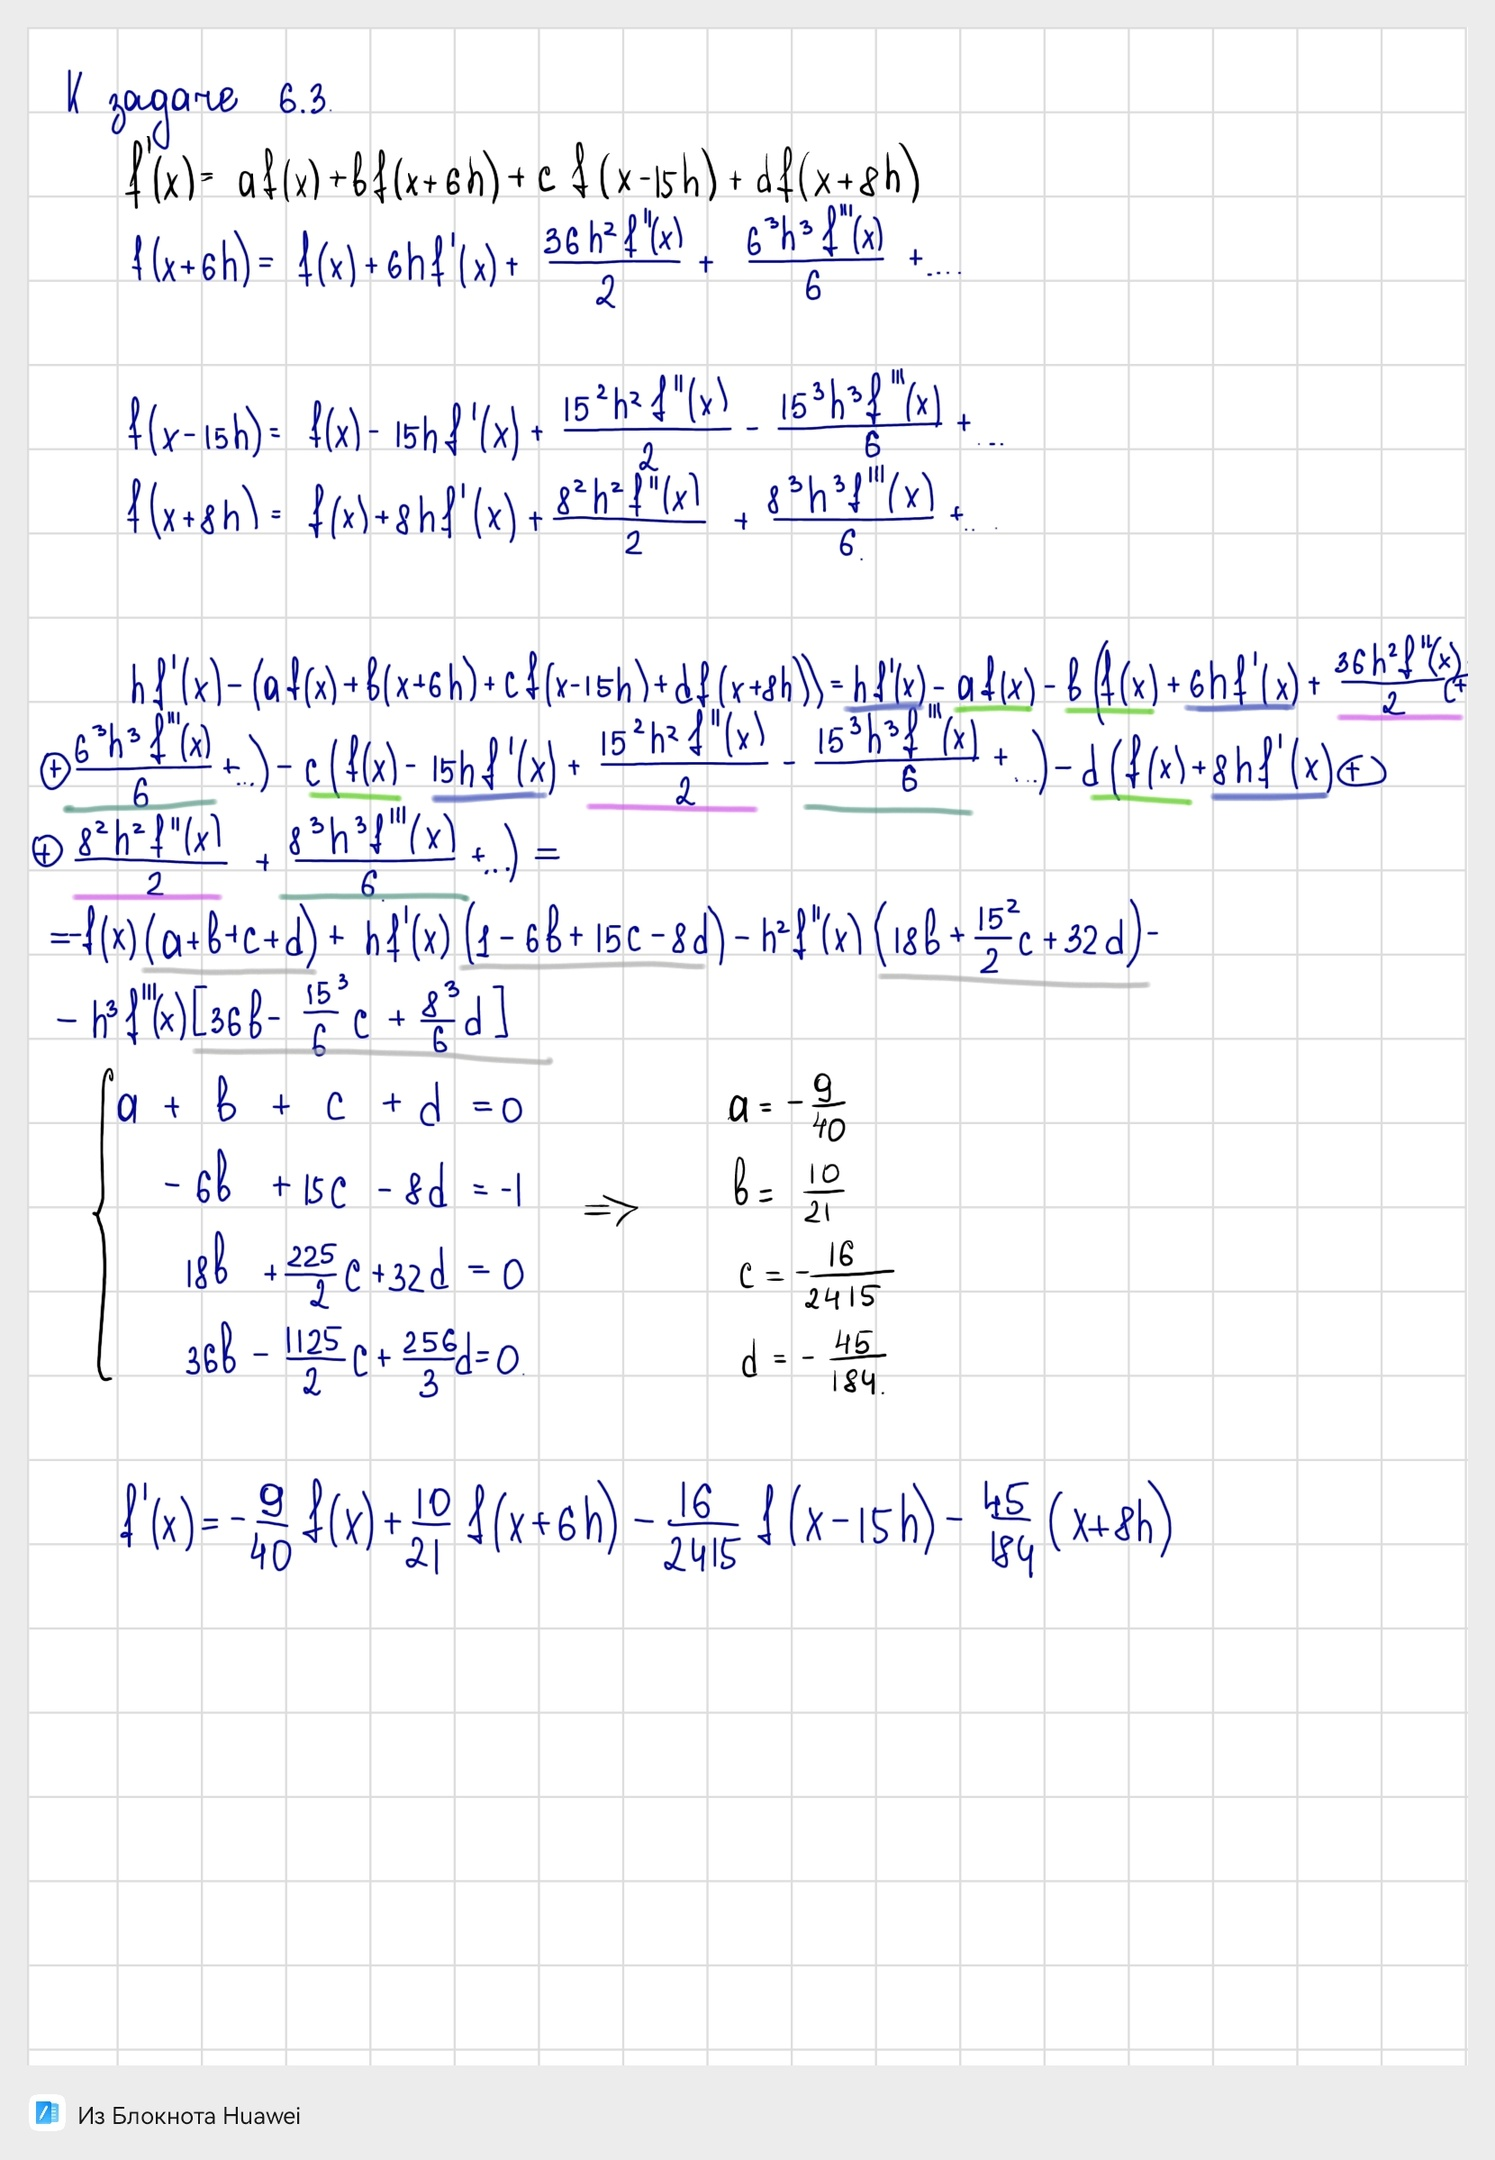
#### 2.  Реализовать программно полученную формулу численного дифференцирования и формулу правой раз-ностной производной. 

In [11]:
def df(x):
    return 1.4*10*x**9 +1.6*9*x**8+2.1*8*x**7+0.3*7*x**6+2.1*6*x**5+5.4*5*x**4+5.3*4*x**3+2.4*3*x**2-3.3*x+15

def optimal_df(f,x,h):
    return -9/40*f(x)+10/21*f(x+6*h)-16/2415*f(x-15*h)-45/184*f(x+8*h)

def right_proiz(f, h,x):
    return (f(x+h)-f(x))/h



 3. В качестве тестовой функции для проверки корректности работы программы взять функцию из задачи 6.2. На отрезке [a,b] построить графики точной производной и полученные по формулам  численного дифференцирования, выбрав шаг  h0=0.0001.

C:\Users\gagag\AppData\Local\Temp\ipykernel_55960\332403757.py:8: RuntimeWarning: invalid value encountered in divide
  return (f(x+h)-f(x))/h


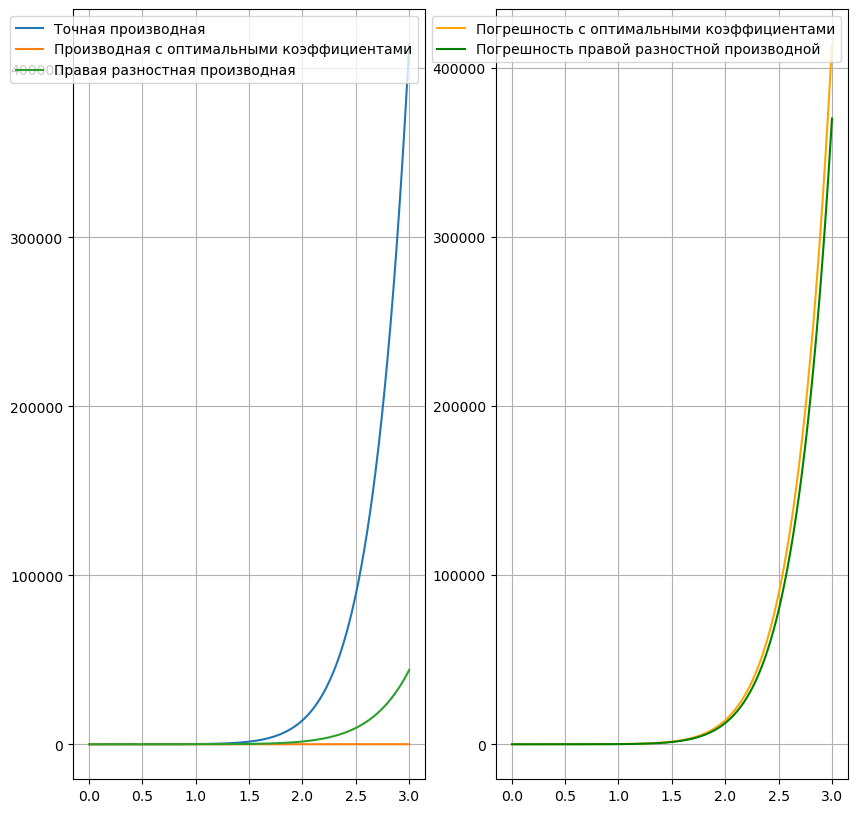

In [12]:
a =0
b =3
h0 =0.0001
x = np.linspace(a,b,1000)


y0 = df(x)
y = optimal_df(P, x, h0)
y1 = right_proiz(P,x,h0)

#Графики
fig,axes =plt.subplots(1,2,figsize = (10,10))
axes[0].plot(x,y0,label="Точная производная")
axes[0].plot(x,y,label="Производная с оптимальными коэффициентами")
axes[0].plot(x,y1,label="Правая разностная производная")

# Посмотрим погрешность
axes[1].plot(x,abs(y0 - y),color='orange', label="Погрешность с оптимальными коэффициентами")
axes[1].plot(x,abs(y0 - y1), color='green',label="Погрешность правой разностной производной")
axes[0].grid()
axes[0].legend()
axes[1].grid()
axes[1].legend()

##### 4. Выбрать среднюю точку  отрезка интегрирования  [a,b] и вычислить значения производных  по формулам  численного дифференцирования,  уменьшая шаг дифференцирования  h0=0.1 последовательно в 10 раз:  , k=0,1,2,…Найти оптимальное значение шага дифференцирования для каждой формулы численного дифференцирования.  По полученным данным построить графики погрешностей.*

Оптимальный шаг:
1. Для правой разностной производной = 0.1
1. Для оптимальных коэффициентов = 0.01


C:\Users\gagag\AppData\Local\Temp\ipykernel_55960\332403757.py:8: RuntimeWarning: invalid value encountered in divide
  return (f(x+h)-f(x))/h


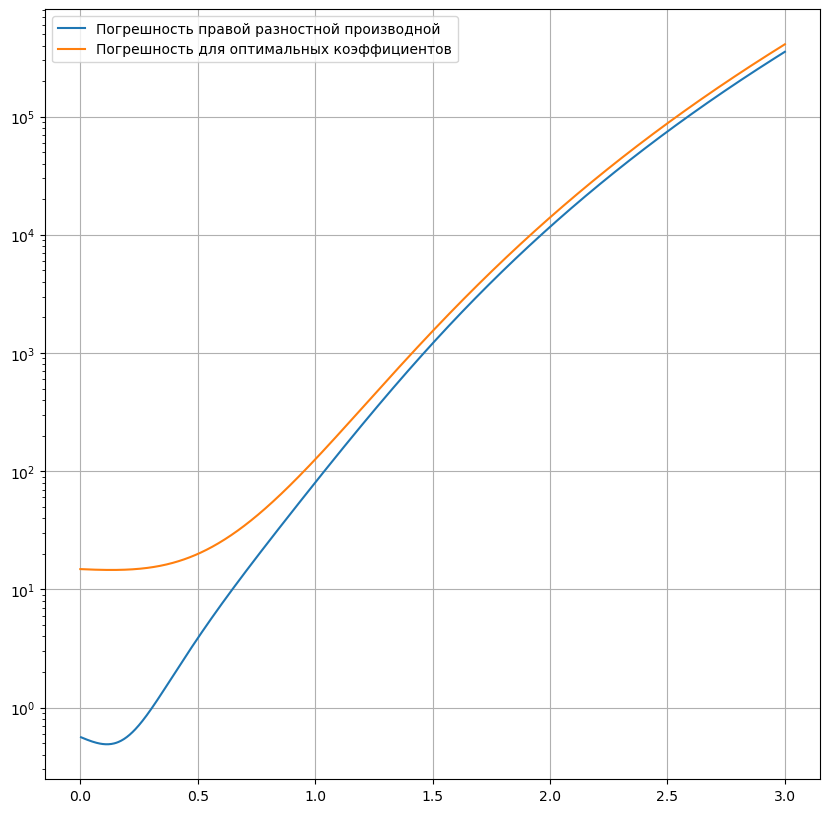

In [13]:
# Средняя точка отрезка

aver = (a+b)/2
h = 0.1
# Массивы значений погрешностей
right_error = []

optimal_error = []

# Массивы значений производной
right = []
optimal = []
#Значение точной производной в произвольной точке
exact_derivative = df(aver)

for i in range(10):
    optimal.append(optimal_df(P, aver, h))
    right.append(right_proiz(P,aver,h))
    optimal_error.append(exact_derivative - optimal[i])
    right_error.append(exact_derivative - right[i])
    h /= 10
    
# Найдем оптимальный шаг

h_right = 10**((right_error.index(min(right_error))+1)*(-1))
h_optimal = 10**((optimal_error.index(min(optimal_error))+1)*(-1))

print(f"Оптимальный шаг:")
print(f"1. Для правой разностной производной = {h_right}")
print(f"1. Для оптимальных коэффициентов = {h_optimal}")


# Построим графики

x_new = np.linspace(a,b,1000)
y_new = df(x_new)
y_new_right = right_proiz(P,x_new,h_right)
y_new_optimal = optimal_df(P,x_new,h_optimal)
    
fig,axes =plt.subplots(1,figsize = (10,10))
axes.plot(x_new,abs(y_new-y_new_right),label="Погрешность правой разностной производной")
axes.plot(x_new,abs(y_new - y_new_optimal),label="Погрешность для оптимальных коэффициентов")
axes.set_yscale('log')
axes.grid()
axes.legend()


